# Project: Digit Recognition Classification
data sources: https://www.kaggle.com/code/jianyzhu/minist-digital-recognition/data
## 1 Data Pre-processing

In [20]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# read data
df = pd.read_csv("train.csv")
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_sample = df.sample(10000)

In [4]:
y = df_sample[df_sample.columns[0]]
X = df_sample[df_sample.columns[1:]]

In [5]:
# split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2 Hyperparameter Experiments - 5 models

### 2.1 Decision Tree with pruning
#### 2.1.1 max_depth of decision tree

In [6]:
# Examine the max_depth in vanilla decision tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
print(model_dt.get_depth())
print(model_dt.get_n_leaves())

25
878


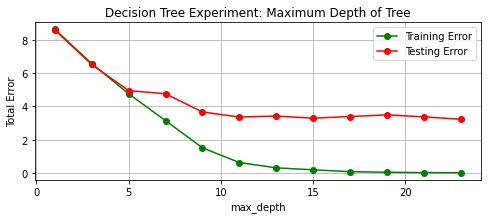

In [8]:
max_depth_list = np.arange(1,25,2)

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=x) 
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = max_depth_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-', color='g', label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, 'o-', color='r',label='Testing Error') # Plot testing error over domain
plt.xlabel('max_depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Decision Tree Experiment: Maximum Depth of Tree')
plt.savefig('MINIST_DT_max_depth.png')
plt.show() # Show graph

#### 3.1.2 min_samples_leaf of decision tree

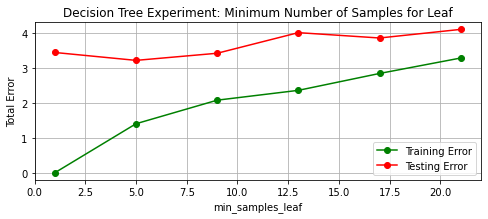

In [9]:
min_samples_leaf_list = np.arange(1,25,4)

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in min_samples_leaf_list:
    dtc = DecisionTreeClassifier(min_samples_leaf=x) 
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = min_samples_leaf_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors,'o-', color='g', label='Training Error') # Plot training error over domain
plt.plot(x, test_errors,'o-', color='r', label='Testing Error') # Plot testing error over domain
plt.xlabel('min_samples_leaf') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Decision Tree Experiment: Minimum Number of Samples for Leaf')
plt.savefig('MINIST_DT_min_samples_leaf.png')
plt.show() # Show graph

#### 3.1.3 ccp_alpha (Minimal Cost-Complexity Pruning)

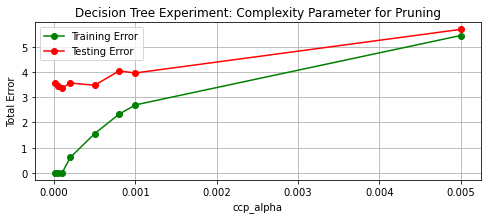

In [10]:
ccp_alpha_list = [0.00001,0.00005,0.0001,0.0002,0.0005,0.0008,0.001,0.005]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in ccp_alpha_list:
    dtc = DecisionTreeClassifier(ccp_alpha=x) 
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = ccp_alpha_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors,'o-', color='g', label='Training Error') # Plot training error over domain
plt.plot(x, test_errors,'o-', color='r', label='Testing Error') # Plot testing error over domain
plt.xlabel('ccp_alpha') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Decision Tree Experiment: Complexity Parameter for Pruning')
plt.savefig("MINIST_DT_ccp_alpha.png")
plt.show() # Show graph

#### 3.1.4 Best Decision Tree

In [41]:
# Hyperparameter tuning for Decision Tree 
# define classifier
model = DecisionTreeClassifier()

# Define a hyper-parameter space to search
parameters = {'max_depth': np.arange(1,25,2), 'min_samples_leaf' : np.arange(1,25,4), 'ccp_alpha' : [0.00001,0.00005,0.0001,0.0002,0.0005,0.0008,0.001,0.005]}

clf = GridSearchCV(model, parameters, cv=5,n_jobs=-1)
clf.fit(X_train, y_train)
# best_max_depth = clf.best_params_['max_depth']
# best_min_samples_leaf = clf.best_params_['min_samples_leaf']

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0005,
                                       0.0008, 0.001, 0.005],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]),
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17, 21])})

In [42]:
clf.best_params_

{'ccp_alpha': 0.0005, 'max_depth': 23, 'min_samples_leaf': 1}

In [45]:
tree_best= DecisionTreeClassifier(max_depth= 23, min_samples_leaf = 1, ccp_alpha= 0.0005)
tree_best.fit(X_train, y_train)
y_pred_b = tree_best.predict(X_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       188
           1       0.88      0.93      0.90       219
           2       0.75      0.73      0.74       202
           3       0.76      0.71      0.73       241
           4       0.83      0.85      0.84       197
           5       0.72      0.71      0.71       172
           6       0.88      0.83      0.85       216
           7       0.79      0.81      0.80       174
           8       0.67      0.74      0.70       180
           9       0.84      0.82      0.83       211

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



In [ ]:
# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_b, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_b, squared=False))
# print('Training accuracy:', round(tree_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(tree_best.score(X_test, y_test),3))

### 3.2 Neural networks
#### 3.2.1 learning_rate_init

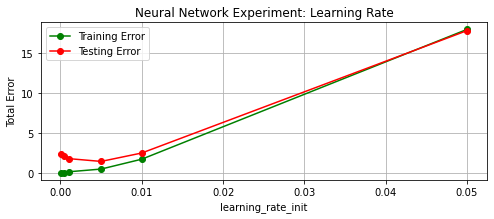

In [13]:
learning_rate_init_list = [0.0001,0.0005,0.001,0.005,0.01,0.05]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in learning_rate_init_list:
    mlp = MLPClassifier(learning_rate_init=x) 
    mlp.fit(X_train,y_train)
    train_z = mlp.predict(X_train)
    test_z = mlp.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = learning_rate_init_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-', color='g',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors,'o-', color='r', label='Testing Error') # Plot testing error over domain
plt.xlabel('learning_rate_init') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Neural Network Experiment: Learning Rate')
plt.savefig('MINIST_NN_learning_rate.png')
plt.show() # Show graph

### 3.2.2 activation

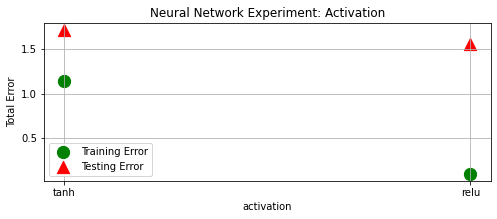

In [14]:
activation_list = ['tanh', 'relu']

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in activation_list:
    mlp = MLPClassifier(activation =x) 
    mlp.fit(X_train,y_train)
    train_z = mlp.predict(X_train)
    test_z = mlp.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))
    
x = activation_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.scatter(x, train_errors,  marker='o', color='g', s=150, label='Training Error') # Plot training error over domain
plt.scatter(x, test_errors,  marker='^', color='r', s=150, label='Testing Error') # Plot testing error over domain
plt.xlabel('activation') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Neural Network Experiment: Activation')
plt.savefig('MINIST_NN_activation.png')
plt.show() # Show graph

#### 3.2.3 Best MLP Classifier

In [43]:
# define classifier
mlp = MLPClassifier(max_iter=100)

# Define a hyper-parameter to search
parameters = {
    'hidden_layer_sizes': [(50,50,50,50,50), (50,50,50,50), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# find best MLP Classifier
clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50, 50, 50),
                                                (50, 50, 50, 50), (50, 50, 50),
                                                (50, 100, 50), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [44]:
# print best model's prameter
print(clf.best_params_)

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [46]:
mlp_best = MLPClassifier(max_iter=100, activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (100,), learning_rate = 'adaptive', solver = 'adam' )
mlp_best.fit(X_train, y_train)
y_pred_b = mlp_best.predict(X_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       188
           1       0.95      0.97      0.96       219
           2       0.87      0.86      0.86       202
           3       0.93      0.80      0.86       241
           4       0.93      0.92      0.93       197
           5       0.81      0.88      0.84       172
           6       0.94      0.93      0.94       216
           7       0.94      0.91      0.92       174
           8       0.80      0.92      0.85       180
           9       0.90      0.90      0.90       211

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [30]:
# mlp_best.fit(X_train, y_train)

In [31]:
# y_pred_train_mlp = mlp_best.predict(X_train)
# y_pred_mlp = mlp_best.predict(X_test)

# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_mlp, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_mlp, squared=False))
# print('Training accuracy:', round(mlp_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(mlp_best.score(X_test, y_test),3))

### 3.3 Boosting

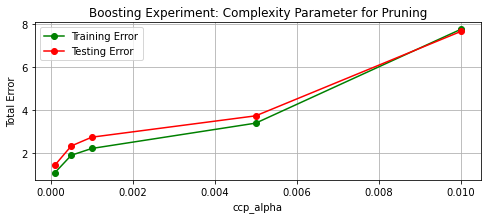

In [17]:
ccp_alpha_list =[0.0001,0.0005,0.001,0.005,0.01]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in ccp_alpha_list:
    bc = GradientBoostingClassifier(ccp_alpha=x) 
    bc.fit(X_train,y_train)
    train_z = bc.predict(X_train)
    test_z = bc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = ccp_alpha_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-', color='g',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, 'o-', color='r',label='Testing Error') # Plot testing error over domain
plt.xlabel('ccp_alpha') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Boosting Experiment: Complexity Parameter for Pruning')
plt.savefig('MINIST_BST_ccp_alpha.png')
plt.show() # Show graph

#### 3.3.2 Learning rate

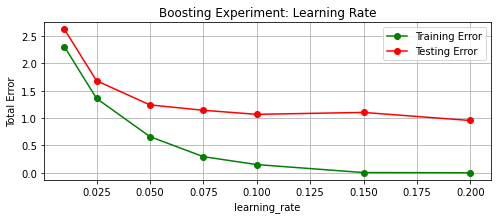

In [18]:
learning_rate_list = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in learning_rate_list:
    bc = GradientBoostingClassifier(learning_rate=x) 
    bc.fit(X_train,y_train)
    train_z = bc.predict(X_train)
    test_z = bc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = learning_rate_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-', color='g',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, 'o-', color='r',label='Testing Error') # Plot testing error over domain
plt.xlabel('learning_rate') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Boosting Experiment: Learning Rate')
plt.savefig('MINIST_BST_learning_rate.png')
plt.show() # Show graph

#### 3.3.3 best boosting

In [21]:
# define classifier
boost=GradientBoostingClassifier()

# Define a hyper-parameter to search
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'ccp_alpha' :[0.0001,0.0005,0.001],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

# find best Classifier
clf = GridSearchCV(boost, parameters, cv=5, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.best_params_)

{'ccp_alpha': 0.0001, 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}


In [32]:
bst_best = GradientBoostingClassifier(ccp_alpha =0.0001 ,learning_rate = 0.05, loss= 'deviance', max_depth = 8, max_features= 'sqrt', n_estimators=10, subsample= 0.95)
bst_best.fit(X_train, y_train)
y_pred_b =bst_best.predict(X_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       188
           1       0.95      0.97      0.96       219
           2       0.90      0.91      0.90       202
           3       0.88      0.85      0.87       241
           4       0.93      0.94      0.93       197
           5       0.93      0.89      0.91       172
           6       0.96      0.92      0.94       216
           7       0.91      0.91      0.91       174
           8       0.85      0.89      0.87       180
           9       0.90      0.91      0.91       211

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.91      2000



In [38]:
# boost_best=GradientBoostingClassifier(learning_rate= 0.2, loss= 'deviance', max_depth= 8, max_features='log2', min_samples_leaf= 1, n_estimators= 10, subsample= 1.0)
# boost_best.fit(X_train, y_train)

In [39]:
# y_pred_train_boost = boost_best.predict(X_train)
# y_pred_boost = boost_best.predict(X_test)

# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_boost, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_boost, squared=False))
# print('Training accuracy:', round(boost_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(boost_best.score(X_test, y_test),3))

### 3.4 Support Vector Machines

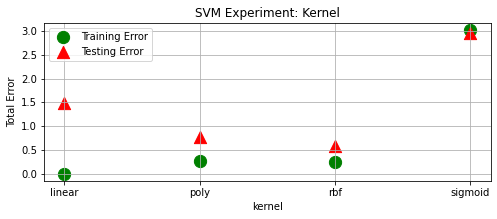

In [22]:
kernel_list = ['linear','poly' , 'rbf', 'sigmoid']

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in kernel_list:
    svm = SVC(kernel=x) 
    svm.fit(X_train,y_train)
    train_z = svm.predict(X_train)
    test_z = svm.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))
    
x = kernel_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.scatter(x, train_errors,  marker='o', color='g', s=150, label='Training Error') # Plot training error over domain
plt.scatter(x, test_errors,  marker='^', color='r', s=150, label='Testing Error') # Plot testing error over domain
plt.xlabel('kernel') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('SVM Experiment: Kernel')
plt.savefig('MINIST_SVM_kernel.png')
plt.show() # Show graph

#### 3.4.2 Regularization parameter C

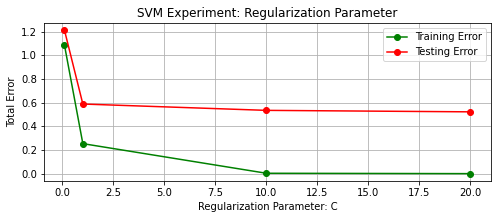

In [23]:
C_list = [0.1,1, 10, 20]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in C_list:
    svm = SVC(C=x) 
    svm.fit(X_train,y_train)
    train_z = svm.predict(X_train)
    test_z = svm.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = C_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-', color='g', label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, 'o-', color='r',label='Testing Error') # Plot testing error over domain
plt.xlabel('Regularization Parameter: C') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('SVM Experiment: Regularization Parameter')
plt.savefig('MINIST_SVM_C.png')
plt.show() # Show graph

#### 3.4.2 best SVM

In [37]:
# define classifier
svm = SVC()

# Define a hyper-parameter to search
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# find best Classifier
clf = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [38]:
print(clf.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [39]:
y_pred_b =clf.predict(X_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       188
           1       0.96      0.98      0.97       219
           2       0.94      0.93      0.93       202
           3       0.96      0.92      0.94       241
           4       0.98      0.97      0.98       197
           5       0.94      0.95      0.94       172
           6       0.96      0.96      0.96       216
           7       0.96      0.97      0.97       174
           8       0.94      0.97      0.95       180
           9       0.97      0.96      0.96       211

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [40]:
svm_best = SVC(C=0.1, gamma=1,kernel= 'poly')
svm_best.fit(X_train, y_train)
y_pred_b =svm_best.predict(X_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       188
           1       0.96      0.98      0.97       219
           2       0.94      0.93      0.93       202
           3       0.96      0.92      0.94       241
           4       0.98      0.97      0.98       197
           5       0.94      0.95      0.94       172
           6       0.96      0.96      0.96       216
           7       0.96      0.97      0.97       174
           8       0.94      0.97      0.95       180
           9       0.97      0.96      0.96       211

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [45]:
# svm_best = SVC(C=100, gamma=0.001,kernel= 'rbf')
# svm_best.fit(X_train, y_train)

In [46]:
# y_pred_train_svm = svm_best.predict(X_train)
# y_pred_svm = svm_best.predict(X_test)

# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_svm, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_svm, squared=False))
# print('Training accuracy:', round(svm_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(svm_best.score(X_test, y_test),3))

### 3.5 k-nearest neighbors
#### 3.5.1 n_neighbors

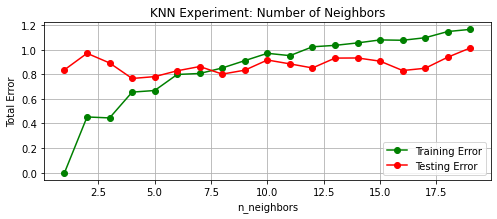

In [26]:
n_neighbors_list = np.arange(1,20)

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=x) 
    knn.fit(X_train,y_train)
    train_z = knn.predict(X_train)
    test_z = knn.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = n_neighbors_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-', color='g',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors,'o-', color='r', label='Testing Error') # Plot testing error over domain
plt.xlabel('n_neighbors') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('KNN Experiment: Number of Neighbors')
plt.savefig('MINIST_KNN_n_neighbors.png')
plt.show() # Show graph

#### 3.5.2 Best KNN

In [27]:
# define classifier
knn = KNeighborsClassifier()

# Define a hyper-parameter to search
parameters = {'n_neighbors':np.arange(1,20), 'metric':['euclidean', 'manhattan']}

# find best Classifier
clf = GridSearchCV(knn, parameters, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train,y_train)

C:\Users\anluz\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='f1')

In [28]:
print(clf.best_params_)

{'metric': 'euclidean', 'n_neighbors': 1}


In [34]:
knn_best = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_best.fit(X_train, y_train)
y_pred_b =knn_best.predict(X_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       188
           1       0.96      0.99      0.97       219
           2       0.97      0.95      0.96       202
           3       0.94      0.90      0.92       241
           4       0.94      0.94      0.94       197
           5       0.92      0.93      0.93       172
           6       0.96      0.96      0.96       216
           7       0.94      0.95      0.95       174
           8       0.93      0.91      0.92       180
           9       0.92      0.93      0.92       211

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [51]:
# knn_best = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# knn_best.fit(X_train, y_train)

In [52]:
# y_pred_train_knn = knn_best.predict(X_train)
# y_pred_knn = knn_best.predict(X_test)

# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_knn, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_knn, squared=False))
# print('Training accuracy:', round(knn_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(knn_best.score(X_test, y_test),3))

## 4. Best Models Learning Curve

In [49]:
def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,scoring=None,train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training size")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(estimator,X,y,scoring=scoring,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="b",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="y",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="b", label="Training"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="y", label="Validation"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training size")
    axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability")

    # Plot fit_time vs score
#     fit_time_argsort = fit_times_mean.argsort()
#     fit_time_sorted = fit_times_mean[fit_time_argsort]
#     test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
#     test_scores_std_sorted = test_scores_std[fit_time_argsort]
#     axes[1].grid()
#     axes[1].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
#     axes[1].fill_between(
#         fit_time_sorted,
#         test_scores_mean_sorted - test_scores_std_sorted,
#         test_scores_mean_sorted + test_scores_std_sorted,
#         alpha=0.1,
#     )
#     axes[1].set_xlabel("fit_times")
#     axes[1].set_ylabel("Score")
#     axes[1].set_title("Performance of the model")

    # Plot n_samples vs score_times
#     axes[2].grid()
#     axes[2].plot(train_sizes, score_times_mean, "o-")
#     axes[2].fill_between(
#         train_sizes,
#         score_times_mean - score_times_std,
#         score_times_mean + score_times_std,
#         alpha=0.1,
#     )
#     axes[2].set_xlabel("Training size")
#     axes[2].set_ylabel("score_times")

    return plt


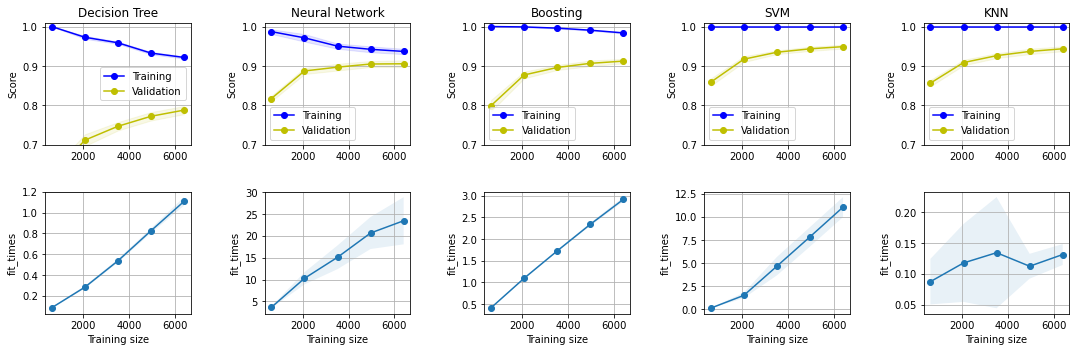

In [50]:
fig, axes = plt.subplots(2, 5, figsize=(15,5))
fig.tight_layout(h_pad=3, w_pad=4)
plt.gcf().subplots_adjust(bottom=0.15)

title = "Decision Tree"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(max_depth= 23, min_samples_leaf = 1, ccp_alpha= 0.0005)
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)


title = "Neural Network"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator =  MLPClassifier(max_iter=100, activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (100,), learning_rate = 'adaptive', solver = 'adam' )
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 1],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = "Boosting"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier(ccp_alpha =0.0001 ,learning_rate = 0.05, loss= 'deviance', max_depth = 8, max_features= 'sqrt', n_estimators=10, subsample= 0.95)
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 2],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = "SVM"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = SVC(C=0.1, gamma=1,kernel= 'poly')
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 3],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = "KNN"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 4],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

plt.savefig('MINIST_best_models.png')
plt.show()